In [20]:
from pathlib import Path
from collections import defaultdict
import torch
import matplotlib.pyplot as plt

import sys
sys.path.append("../")


def plot_barriers(ax, stats, is_train):
    interpolation = stats['interpolation']
    eval_loss = stats['eval_loss']
    acc = stats['acc']
    loss_barrier = stats['loss_barrier']
    acc_barrier = stats['acc_barrier']
    linestyle = 'dotted' if is_train else 'solid'
    label = 'train' if  is_train else 'test'
    ax.set_ylim(-0.9, 3.5)
    ax.plot(interpolation, eval_loss, c='orange', linestyle=linestyle, alpha=0.5, label=f'{label} loss')
    ax.plot(interpolation, loss_barrier, c='red', linestyle=linestyle, linewidth=2, label=f'{label} loss barrier')
    ax.plot(interpolation, acc, c='teal', linestyle=linestyle, alpha=0.5, label=f'{label} accuracy')
    ax.plot(interpolation, acc_barrier, c='blue', linestyle=linestyle, linewidth=2, label=f'{label} acc barrier')

def plot_train_test_barriers(*name_train_test):
    n = max(len(name_train_test), 2)
    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(4 * n, 4))
    for (name, train, test), ax in zip(name_train_test, axes):
        ax.set_title(name)
        plot_barriers(ax, train, True)
        plot_barriers(ax, test, False)
    plt.legend()
    plt.show()

In [21]:
model_name_to_dir = {
    "cifar_vgg_16_8": "lottery_3d9c91d3d4133cfcdcb2006da1507cbb",
    "cifar_vgg_16_16": "lottery_2915b34d8b29a209ffee2288466cf5f6",
    "cifar_vgg_16_32": "lottery_c855d7c25ffef997a89799dc08931e82",
    "cifar_vgg_16_128": "lottery_8d561a7b273e4d6b2705ba6d627a69bd",
    "cifar_vgg_16_256": "lottery_a309ac4ab15380928661e70ca8b054a1",
}

1


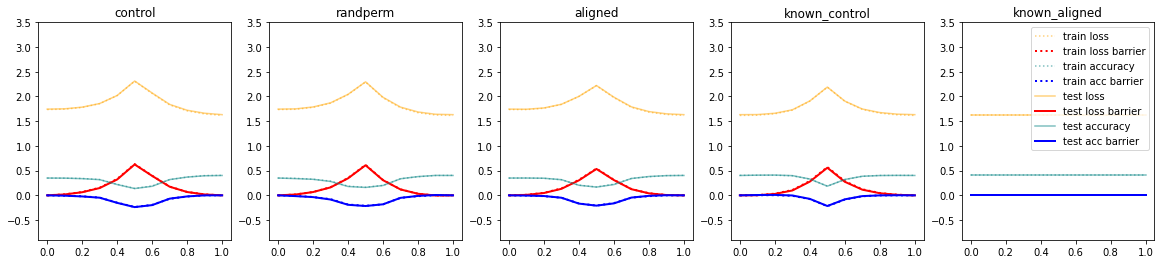

2


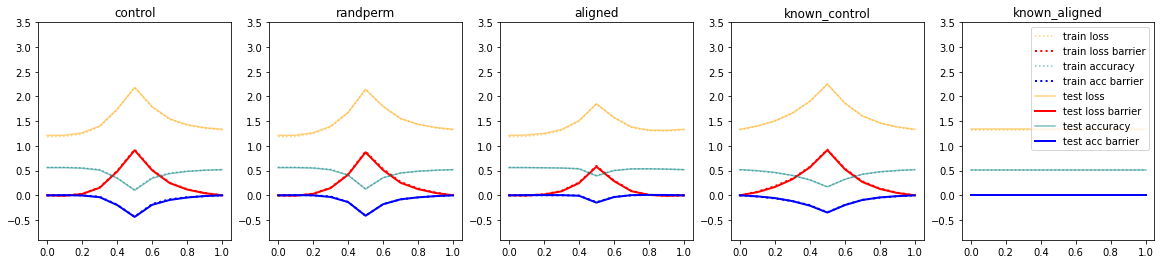

5


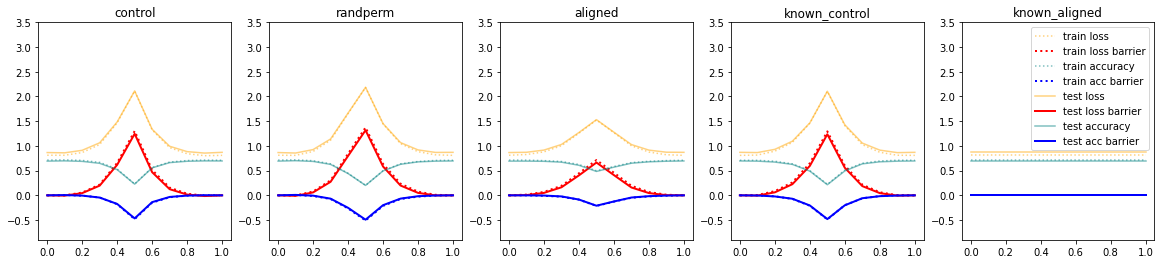

10


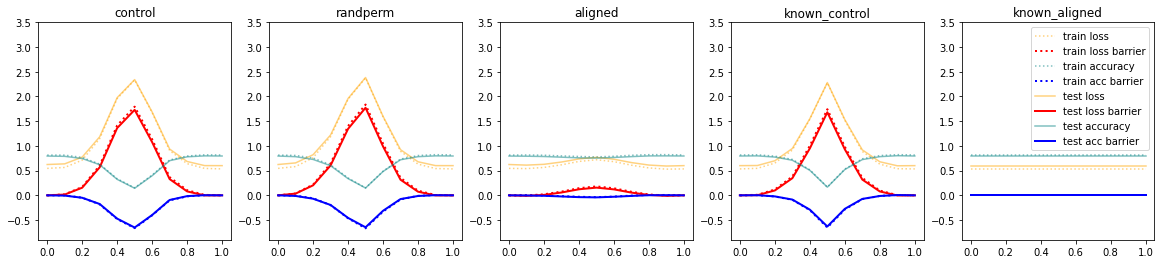

20


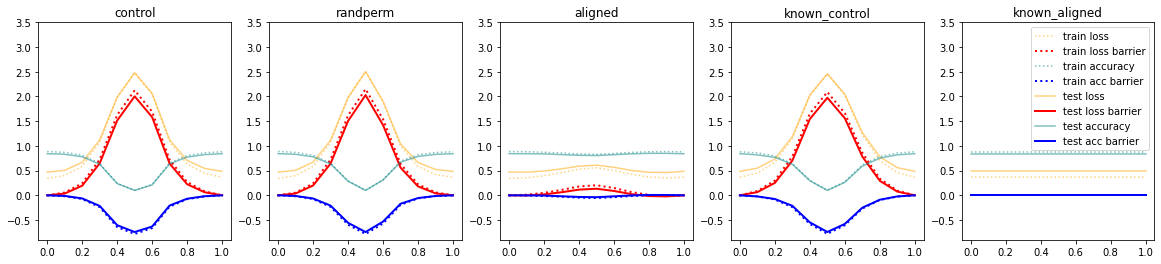

100


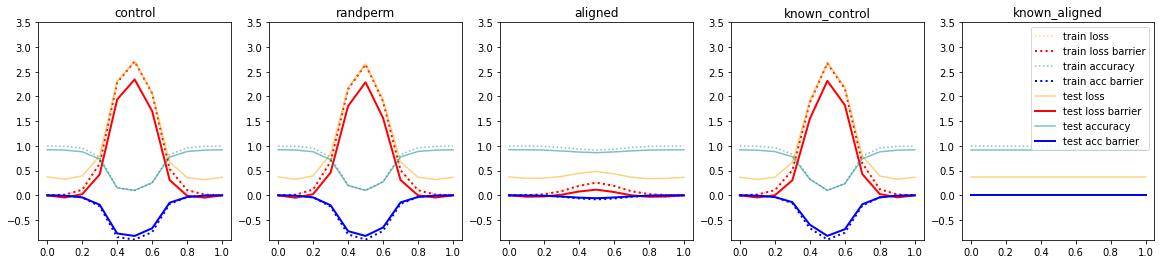

160


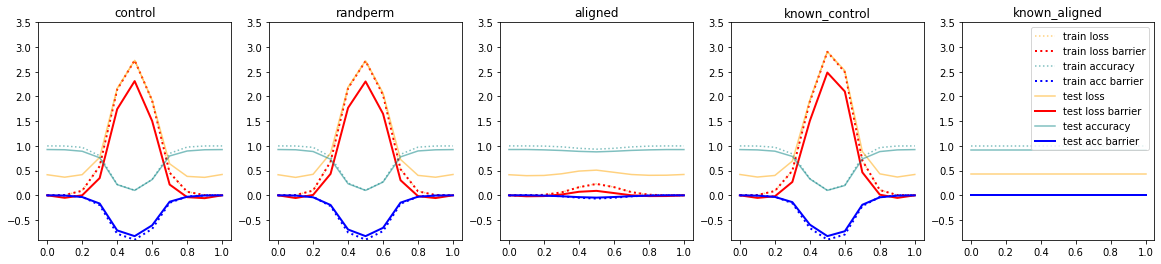

In [38]:
def get_ep_from_filename(x):
    return int(x.stem.split("_")[-2][2:])

def summarize_barrier(k, v):
    x = max(v) if "loss" in k else min(v) if "acc" in k else len(v)
    return x * -1 if k == "acc_barrier" else x

stats_dir = Path("../refactor-outputs/sanity-check")
files = sorted(list(stats_dir.glob("*//*/*.pt")), key=get_ep_from_filename)
epochs = [get_ep_from_filename(x) for x in files]
barrier_data = defaultdict(list)
for epoch, file in zip(epochs, files):
    name = file.stem
    stats_dict = torch.load(file)
    print(epoch)
    [barrier_data["train_" + k].append(summarize_barrier(k, v)) for k, v in stats_dict['train_aligned'].items()]
    [barrier_data["test_" + k].append(summarize_barrier(k, v)) for k, v in stats_dict['test_aligned'].items()]
    plot_train_test_barriers(
        ["control", stats_dict['train_control'], stats_dict['test_control']],
        ["randperm", stats_dict['train_randperm'], stats_dict['test_randperm']],
        ["aligned", stats_dict['train_aligned'], stats_dict['test_aligned']],
        ["known_control", stats_dict['train_known_control'], stats_dict['test_known_control']],
        ["known_aligned", stats_dict['train_known_aligned'], stats_dict['test_known_aligned']],
    )


[1, 2, 5, 10, 20, 100, 160] defaultdict(<class 'list'>, {'train_interpolation': [11, 11, 11, 11, 11, 11, 11], 'train_eval_loss': [2.217671, 1.848233, 1.5241929, 0.7202445, 0.5569216, 0.26495147, 0.23155701], 'train_acc': [0.169, 0.4033, 0.4972, 0.7784, 0.8292, 0.915, 0.9339], 'train_loss_barrier': [0.54134864, 0.59461516, 0.7141047, 0.18027996, 0.2035376, 0.25724977, 0.23048706], 'train_acc_barrier': [0.20775, 0.1382, 0.21415, 0.0373, 0.0548, 0.0824, 0.0658], 'test_interpolation': [11, 11, 11, 11, 11, 11, 11], 'test_eval_loss': [2.2221022, 1.8531228, 1.5310634, 0.7679154, 0.6103842, 0.48296133, 0.5095588], 'test_acc': [0.1668, 0.3923, 0.4836, 0.7539, 0.8047, 0.8632, 0.8794], 'test_loss_barrier': [0.5339472, 0.57839423, 0.6633758, 0.15574303, 0.13341005, 0.114406876, 0.09023411], 'test_acc_barrier': [0.2088, 0.148, 0.2102, 0.0412, 0.03785, 0.05875, 0.0467]})


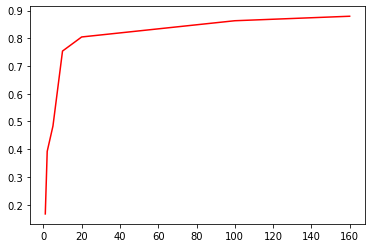

In [39]:
print(epochs, barrier_data)
plt.plot(epochs, barrier_data["test_acc"], color="red", linestyle="solid")
# plt.plot(epochs, barrier_data["test_eval_loss"], color="blue", linestyle="solid")
# plt.plot(epochs, barrier_data["test_acc_barrier"], color="orange", linestyle="solid")
# plt.plot(epochs, barrier_data["test_loss_barrier"], color="green", linestyle="solid")
# plt.plot(epochs, barrier_data["train_acc"], color="red", linestyle="dotted")
# plt.plot(epochs, barrier_data["train_eval_loss"], color="blue", linestyle="dotted")
# plt.plot(epochs, barrier_data["train_acc_barrier"], color="orange", linestyle="dotted")
# plt.plot(epochs, barrier_data["train_loss_barrier"], color="green", linestyle="dotted")
# plt.ylim(0., 0.25)
plt.show()

cifar_vgg_16_16 lottery_2915b34d8b29a209ffee2288466cf5f6_1_2_pretrain_ep160_mse


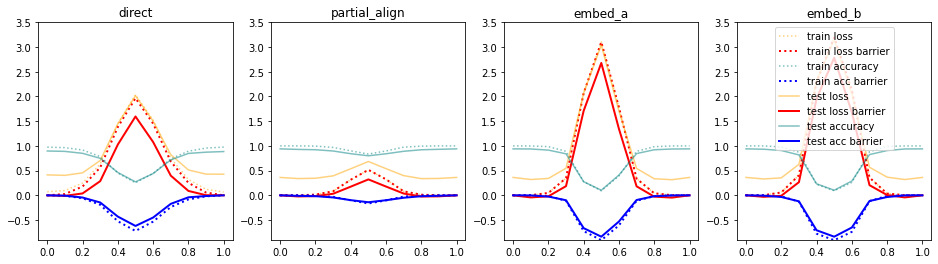

cifar_vgg_16_8 lottery_3d9c91d3d4133cfcdcb2006da1507cbb_1_2_pretrain_ep160_mse


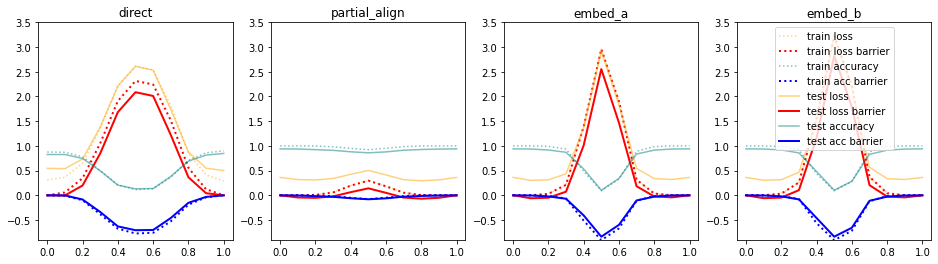

cifar_vgg_16_32 lottery_c855d7c25ffef997a89799dc08931e82_1_2_pretrain_ep160_mse


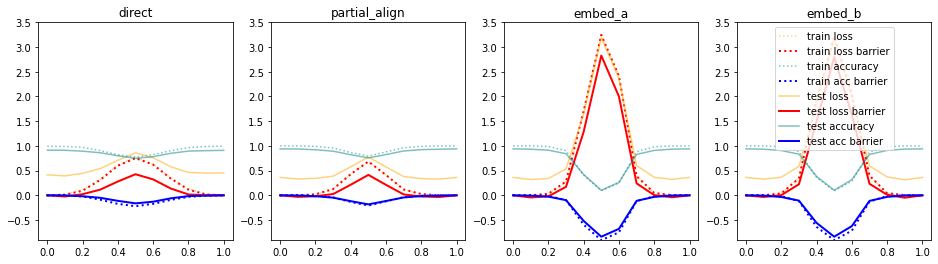

cifar_vgg_16_16 lottery_2915b34d8b29a209ffee2288466cf5f6_1_2_pretrain_ep160_linear


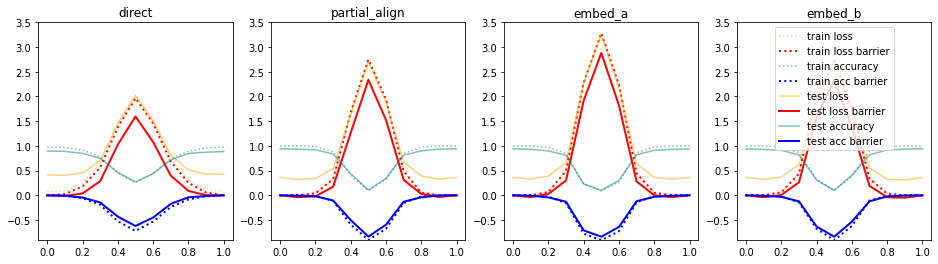

cifar_vgg_16_8 lottery_3d9c91d3d4133cfcdcb2006da1507cbb_1_2_pretrain_ep160_linear


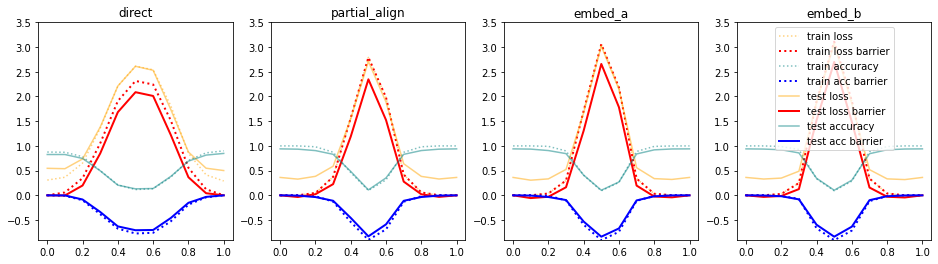

In [16]:
def plot_embed(files):
    for file in files:
        name = file.stem
        for k, v in model_name_to_dir.items():
            if v in file.stem:
                name = k
                key = v
        stats_dict = torch.load(file)
        direct_perm_stats_dict = torch.load(f"../refactor-outputs/kernel-test/scratch/open_lth_data/{key}_1_2_pretrain_ep160_linear.pt")
        print(name, file.stem)
        plot_train_test_barriers(
            ["direct", direct_perm_stats_dict['train_aligned'], direct_perm_stats_dict['test_aligned']],
            ["partial_align", stats_dict['train_partial_align'], stats_dict['test_partial_align']],
            ["embed_a", stats_dict['train_embed_a'], stats_dict['test_embed_a']],
            ["embed_b", stats_dict['train_embed_b'], stats_dict['test_embed_b']],
        )

stats_dir = Path("../refactor-outputs/fix-embed-lottery_8d561a7b273e4d6b2705ba6d627a69bd/")
plot_embed(stats_dir.glob("*mse.pt"))
plot_embed(stats_dir.glob("*linear.pt"))

../refactor-outputs/kernel-test/scratch/open_lth_data/lottery_2915b34d8b29a209ffee2288466cf5f6_1_2_pretrain_ep160_linear.pt


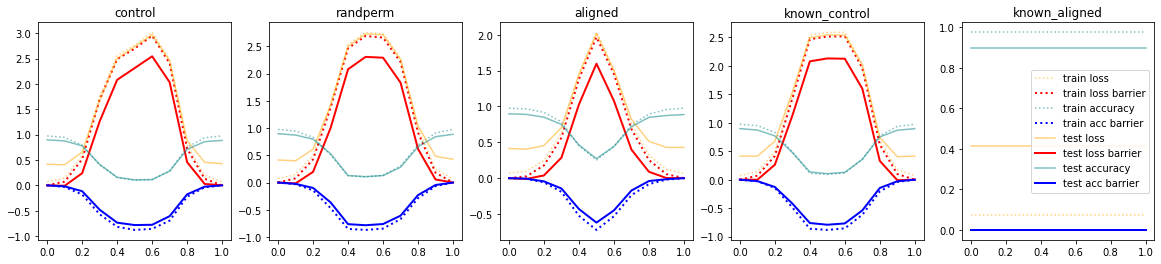

../refactor-outputs/kernel-test/scratch/open_lth_data/lottery_2915b34d8b29a209ffee2288466cf5f6_1_2_pretrain_ep160_mse.pt


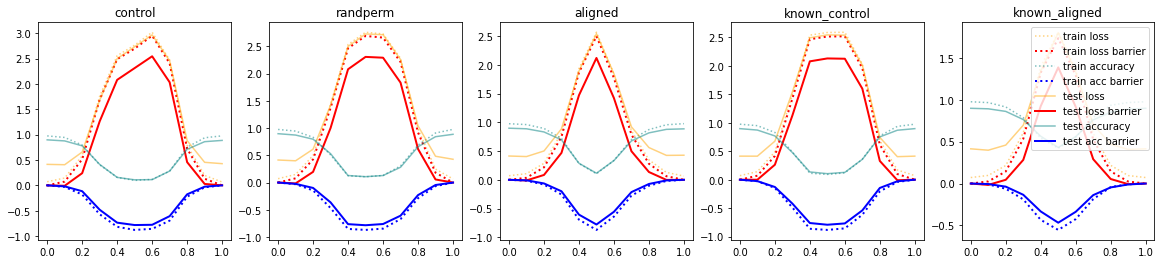

../refactor-outputs/kernel-test/scratch/open_lth_data/lottery_2915b34d8b29a209ffee2288466cf5f6_1_2_pretrain_ep160_sqexp.pt


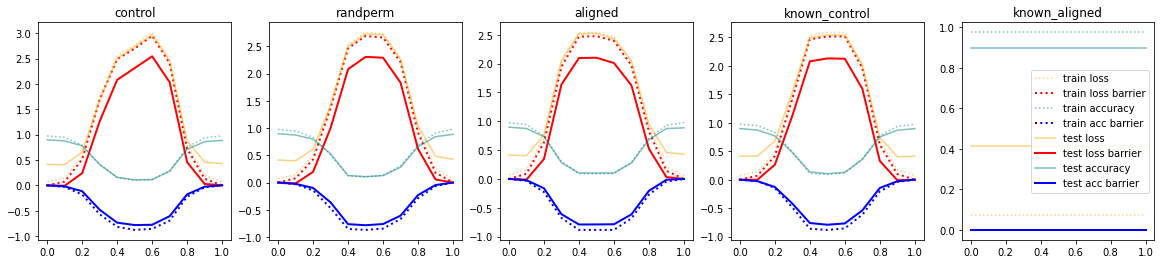

../refactor-outputs/kernel-test/scratch/open_lth_data/lottery_3d9c91d3d4133cfcdcb2006da1507cbb_1_2_pretrain_ep160_linear.pt


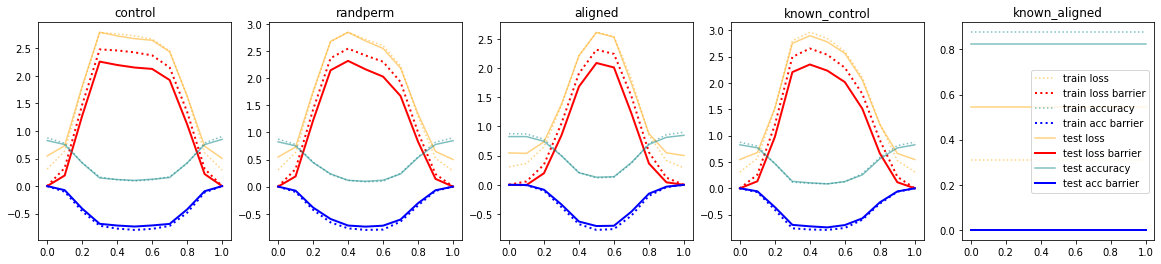

../refactor-outputs/kernel-test/scratch/open_lth_data/lottery_3d9c91d3d4133cfcdcb2006da1507cbb_1_2_pretrain_ep160_mse.pt


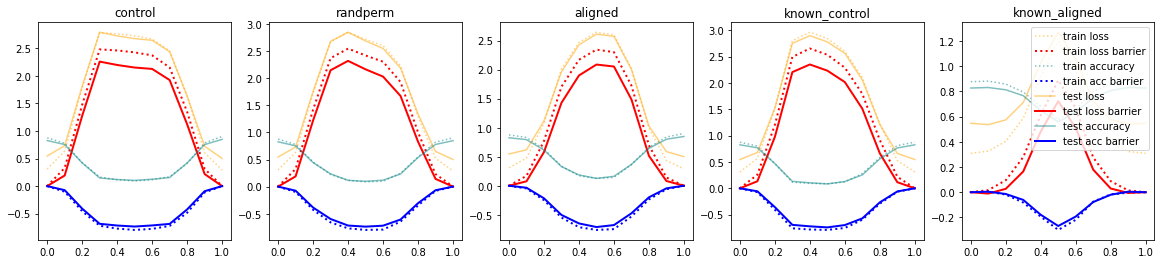

../refactor-outputs/kernel-test/scratch/open_lth_data/lottery_3d9c91d3d4133cfcdcb2006da1507cbb_1_2_pretrain_ep160_sqexp.pt


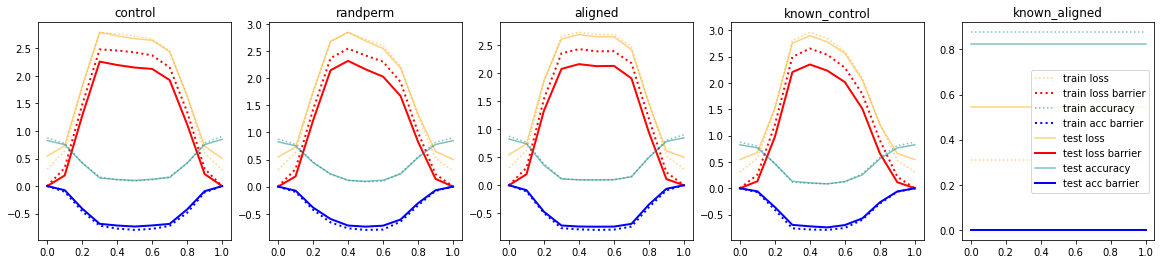

: 

: 

In [14]:
stats_dir = Path("../refactor-outputs/kernel-test/scratch/open_lth_data/")
for file in stats_dir.glob("*.pt"):
    name = file.stem
    for k, v in model_name_to_dir.items():
        if v in file.stem:
            name = k
    stats_dict = torch.load(file)
    print(name)
    plot_train_test_barriers(
        ["control", stats_dict['train_control'], stats_dict['test_control']],
        ["randperm", stats_dict['train_randperm'], stats_dict['test_randperm']],
        ["aligned", stats_dict['train_aligned'], stats_dict['test_aligned']],
        ["known_control", stats_dict['train_known_control'], stats_dict['test_known_control']],
        ["known_aligned", stats_dict['train_known_aligned'], stats_dict['test_known_aligned']],
    )

../refactor-outputs/layer-align/scratch/open_lth_data/lottery_2915b34d8b29a209ffee2288466cf5f6_1_2_pretrain_ep160_linear.pt


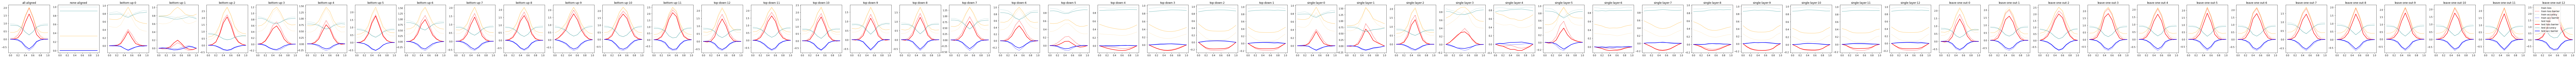

../refactor-outputs/layer-align/scratch/open_lth_data/lottery_3d9c91d3d4133cfcdcb2006da1507cbb_1_2_pretrain_ep160_linear.pt


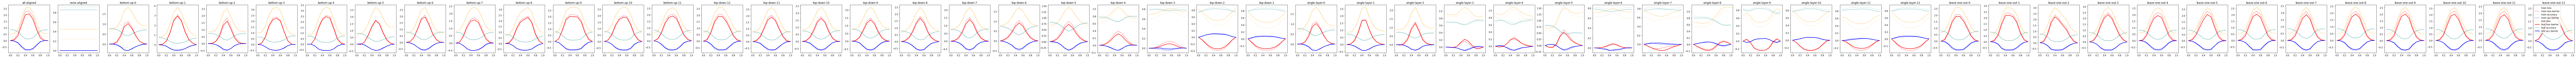

../refactor-outputs/layer-align/scratch/open_lth_data/lottery_8d561a7b273e4d6b2705ba6d627a69bd_1_2_pretrain_ep160_linear.pt


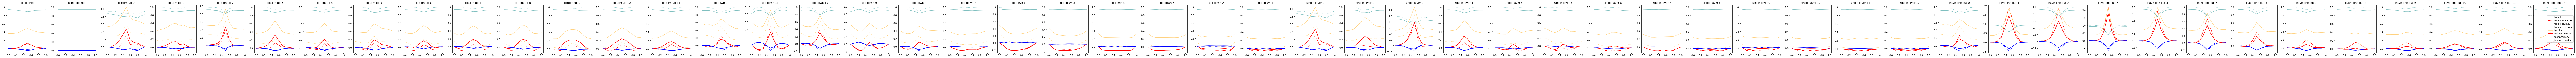

In [19]:
stats_dir = Path("../refactor-outputs/layer-align/scratch/open_lth_data/")
for file in stats_dir.glob("*.pt"):
# for file in stats_dir.glob("lottery_3d*.pt"):
    stats_dict = torch.load(file)
    print(file)
    del stats_dict['args']
    del stats_dict['hparams']
    plot_train_test_barriers(
        *[(k, stats_dict[k]["train_aligned"], stats_dict[k]["test_aligned"]) \
            for k, v in stats_dict.items()])